In [79]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore
import joblib

# For better display
pd.set_option('display.max_columns', None)
print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [80]:
# Load Dataset
df = pd.read_csv("electric_vehicles_spec_2025.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_").str.lower()

print("Shape:", df.shape)
display(df.head())

# Quick summary
display(df.info())
display(df.describe())


Shape: (478, 23)


,brand,model,top_speed_kmh,battery_capacity_kwh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url,price_inr
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...,6170000.0
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...,6147000.0
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...,6355000.0
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...,6343000.0
4,Aiways,U5,150,60.0,Lithium-ion,216.0,310.0,156,315,7.5,78.0,CCS,1000.0,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5,3183000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kwh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            478 non-null    float64
 6   torque_nm                  478 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  478 non-null    float64
 11  fast_charge_port           478 non-null    object 
 12  towing_capacity_kg         478 non-null    float64
 13  cargo_volume_l             478 non-null    object 

None

,top_speed_kmh,battery_capacity_kwh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm,price_inr
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,4.780000e+02
mean,185.487448,74.043724,371.491632,497.016736,162.903766,393.179916,6.882636,124.983264,1049.418410,5.263598,4678.506276,1887.359833,1601.125523,7.025695e+06
std,34.252773,20.331058,928.955974,239.822348,34.317532,103.287335,2.730696,58.146563,717.558948,1.003961,369.210573,73.656807,130.754851,5.211046e+06
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000,1.602000e+06
25%,160.000000,60.000000,216.000000,310.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000,2.897750e+06
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000,6.535000e+06
75%,201.000000,90.600000,288.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000,7.153500e+06
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000,1.670800e+07


In [81]:
# Data Cleaning

df = df.drop_duplicates().reset_index(drop=True)

print("Missing values before cleaning:")
display(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

print("Missing values after cleaning:")
display(df.isnull().sum())
print("✅ Data cleaned successfully.")

Missing values before cleaning:


brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kwh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
price_inr                    0
dtype: int64

Missing values after cleaning:


brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kwh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
price_inr                    0
dtype: int64

✅ Data cleaned successfully.


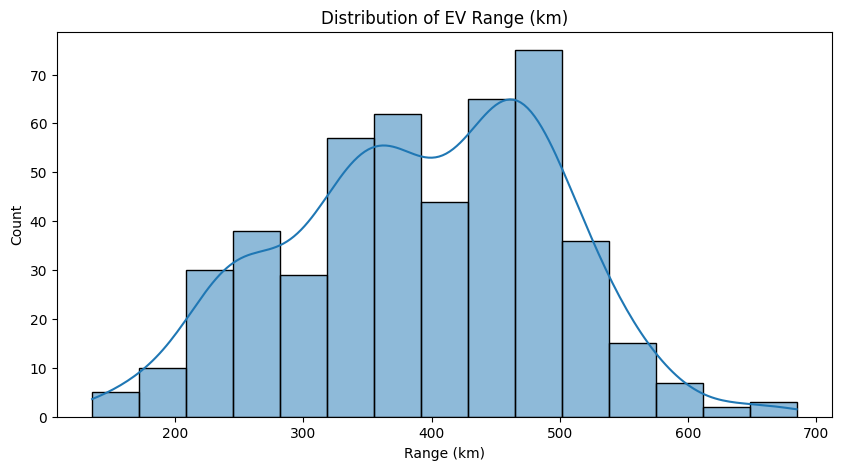

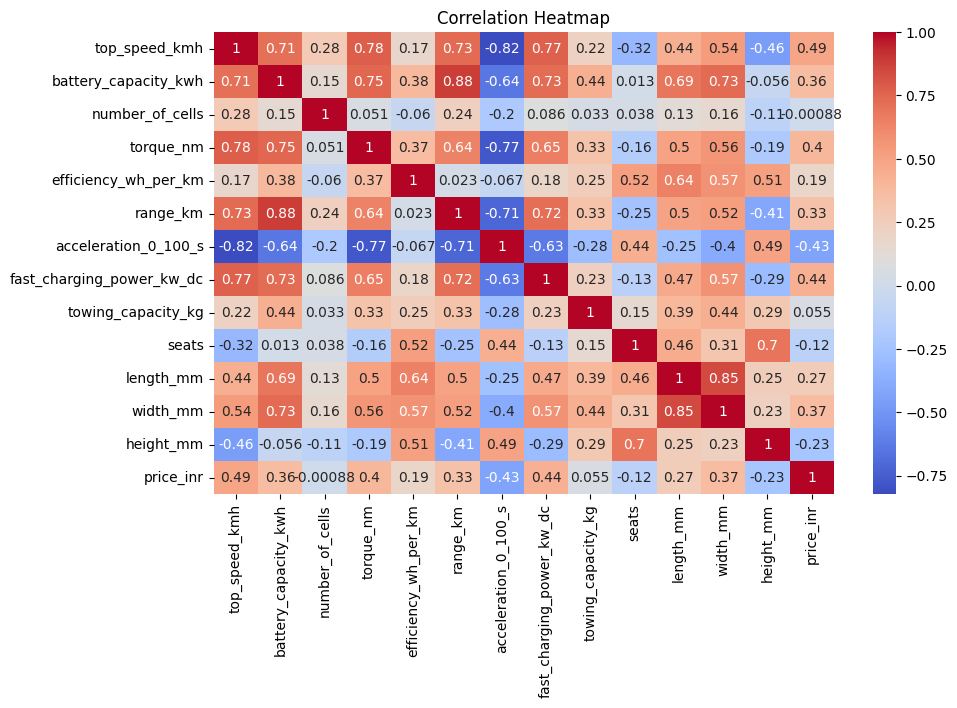

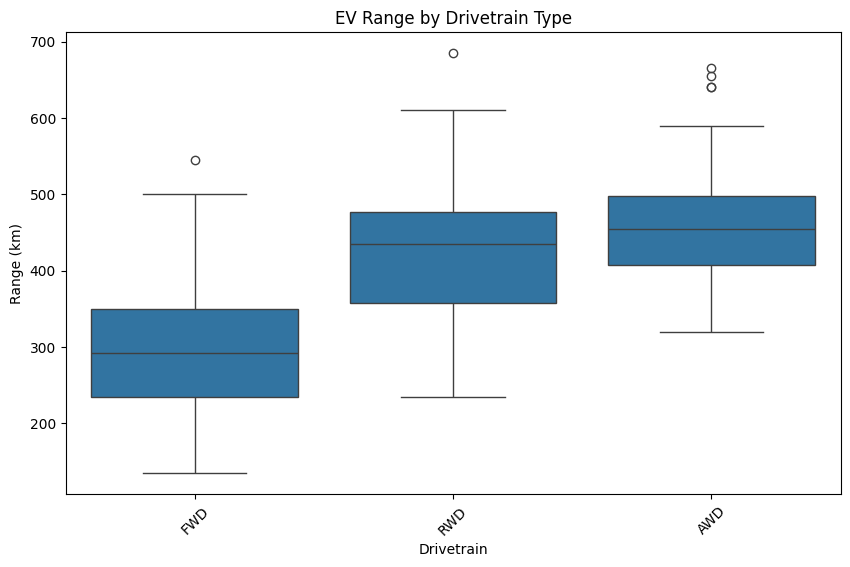

✅ EDA completed.


In [82]:
# Exploratory Data Analysis (EDA)

# Histogram of EV Range (as DataFrame)
plt.figure(figsize=(10,5))
sns.histplot(data=df[["range_km"]], x="range_km", kde=True)  # Pass as DataFrame
plt.title("Distribution of EV Range (km)")
plt.xlabel("Range (km)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot of EV Range vs Drivetrain
if "drivetrain" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='drivetrain', y='range_km', data=df)
    plt.title("EV Range by Drivetrain Type")
    plt.xlabel("Drivetrain")
    plt.ylabel("Range (km)")
    plt.xticks(rotation=45)
    plt.show()
print("✅ EDA completed.")

In [83]:
import numpy as np

# --- Brand Segments ---
segment_A = ["Dacia","Fiat","Opel","Peugeot","Citroen","Renault","Skoda","Dongfeng","Leapmotor","MG","Nissan","Smart","Elaris","Omoda"]
segment_B = ["Hyundai","Kia","Ford","Mazda","Honda","Subaru","Aiways","KGM","Skywell","Volkswagen","Jeep","Maxus","GWM"]
segment_C = ["Audi","BMW","Mercedes-Benz","Lexus","Genesis","Tesla","Polestar","Volvo","Jaguar","BYD","Lucid","Alpine","Abarth"]
segment_D = ["Porsche","Maserati","Lotus","Rolls-Royce","Zeekr","Voyah","XPENG","Firefly"]

# --- Base price depending on brand ---
def get_base_price(brand):
    brand_clean = str(brand).strip().lower()
    if brand_clean in [b.lower() for b in segment_A]:
        return 12_00_000   # ₹12 lakh average
    elif brand_clean in [b.lower() for b in segment_B]:
        return 22_00_000   # ₹22 lakh average
    elif brand_clean in [b.lower() for b in segment_C]:
        return 55_00_000   # ₹55 lakh average
    else:
        return 1_50_00_000 # ₹1.5 crore for ultra-luxury

# --- Body style factor ---
def body_type_factor(model):
    model = str(model).lower()
    if "suv" in model or "xuv" in model or "cross" in model:
        return 2_00_000
    elif "sedan" in model or "saloon" in model or "seal" in model:
        return 1_00_000
    else:
        return 50_000

# --- MAIN PRICE FORMULA (REALISTIC & PREDICTABLE) ---
df["price_inr"] = (
    df["battery_capacity_kwh"] * 13_500 +      # battery dominant factor
    df["range_km"] * 230 +                     # small range multiplier
    df["brand"].apply(get_base_price) +        # segment-based base
    df["model"].apply(body_type_factor) +      # body pricing
    np.random.randint(30_000, 60_000, size=len(df))  # slight noise only
)

# Round nicely
df["price_inr"] = (df["price_inr"] // 1000) * 1000

print(df[["brand","model","price_inr"]].head())
print("✔ Improved realistic price column added!")


    brand                model  price_inr
0  Abarth     500e Convertible  6162000.0
1  Abarth       500e Hatchback  6147000.0
2  Abarth  600e Scorpionissima  6351000.0
3  Abarth         600e Turismo  6330000.0
4  Aiways                   U5  3167000.0
✔ Improved realistic price column added!


In [84]:
# df.to_csv("electric_vehicles_spec_2025.csv", index=False)
# print("✔ price_inr column added to electric_vehicles_spec_2025.csv!")

In [85]:
# Feature Engineering & Preprocessing

# Target variable
target = "price_inr"
y = df[target]

# Feature matrix: keep all columns except target and source_url
X = df.drop(columns=[target, "source_url"])  # brand and model are kept

# Define numeric and categorical columns based on X
numeric_cols = [col for col in X.select_dtypes(include=np.number).columns]
cat_cols = [col for col in X.select_dtypes(exclude=np.number).columns]

# Preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)
print("✅ Preprocessor defined.")

✅ Preprocessor defined.


In [86]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kwh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url,price_inr
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...,6162000.0
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...,6147000.0
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...,6351000.0
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...,6330000.0
4,Aiways,U5,150,60.0,Lithium-ion,216.0,310.0,156,315,7.5,78.0,CCS,1000.0,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5,3167000.0


In [87]:
# Model Training & Evaluation

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
}

# Store results
results = {}

for name, model in models.items():
    # Create pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Fit and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    z_scores = zscore(y_test - y_pred)
    
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2,
        "Z-scores first 5": z_scores[:5]
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n📌 {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


📌 Linear Regression
MSE: 6126223662559.586
RMSE: 2475120.9389764345
MAE: 1279181.5001637032
R²: 0.789956969784652
Z-scores first 5: [-0.01733862 -0.61601454 -0.46700314 -0.76769601  3.04320521]

📌 Random Forest
MSE: 13246103741371.875
RMSE: 3639519.713007731
MAE: 1703715.1041666667
R²: 0.5458455450478672
Z-scores first 5: [ 0.19857054 -0.46256761 -0.41340625 -0.45807853  3.37564242]

📌 XGBoost
MSE: 10713226844112.967
RMSE: 3273106.6044528657
MAE: 1366296.47265625
R²: 0.6326874835676944
Z-scores first 5: [-0.26253724 -0.79010225 -0.46238415 -0.31501421  3.63961668]


In [88]:
joblib.dump(pipeline, f"{model_name.replace(' ', '_').lower()}_model.pkl")
print(f"Model saved as {model_name.replace(' ', '_').lower()}_model.pkl")

Model saved as xgboost_model.pkl


In [89]:
# train+evaluate models and save best

# assume `X`, `y`, `preprocessor`, X_train, X_test, y_train, y_test already defined in Week1
# If not, define same as Week1 cells above (this cell assumes Week1 ran already).

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, random_state=42, eval_metric='rmse', verbosity=0)
}

results = {}
pipelines = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    print(f"\nTraining {name} ...")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    z_scores = zscore(y_test - y_pred)
    
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "Z_first5": z_scores[:5]}
    pipelines[name] = pipe
    
    print(f"{name} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# display results neatly
results_df = pd.DataFrame(results).T.sort_values("RMSE")
display(results_df)

# choose best model by RMSE
best_model_name = results_df.index[0]
best_pipeline = pipelines[best_model_name]
print(f"\n✅ Best model: {best_model_name} (lowest RMSE).")

# Save best pipeline (includes preprocessor)
best_filename = "xgboost_model.pkl" if "XGBoost" in best_model_name else f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
joblib.dump(best_pipeline, best_filename)
print(f"Saved best model pipeline as: {best_filename}")



Training Linear Regression ...
Linear Regression -> RMSE: 2475120.9390, MAE: 1279181.5002, R²: 0.7900

Training Random Forest ...
Random Forest -> RMSE: 3679726.7086, MAE: 1723514.7396, R²: 0.5358

Training XGBoost ...
XGBoost -> RMSE: 3262427.7300, MAE: 1345146.5247, R²: 0.6351


,MSE,RMSE,MAE,R2,Z_first5
Linear Regression,6126223662559.585938,2475120.938976,1279181.500164,0.789957,"[-0.017338621252216, -0.6160145401848376, -0.4..."
XGBoost,10643434693434.220703,3262427.729994,1345146.52474,0.63508,"[-0.27184986178964293, -0.7884334118224358, -0..."
Random Forest,13540388650162.240234,3679726.708624,1723514.739583,0.535756,"[0.22186699324584194, -0.4236509752544891, -0...."



✅ Best model: Linear Regression (lowest RMSE).
Saved best model pipeline as: linear_regression_model.pkl


In [90]:
# feature importance (if model supports it)
importances = None

# Attempt to extract feature names after preprocessing
def get_feature_names(preprocessor):
    # numeric names
    num_cols = preprocessor.transformers_[0][2]
    # categorical onehot names
    cat_transformer = preprocessor.transformers_[1][1]
    cat_cols = preprocessor.transformers_[1][2]
    # get onehot feature names if available
    try:
        # scikit-learn >=1.0:
        ohe = cat_transformer.named_steps['onehot']
        ohe_names = ohe.get_feature_names_out(cat_cols)
    except Exception:
        # fallback
        ohe_names = []
    return list(num_cols) + list(ohe_names)

try:
    feature_names = get_feature_names(best_pipeline.named_steps['preprocessor'])
except Exception:
    # fallback: use X columns (works if preprocessor was built from X)
    feature_names = list(X.columns)

# If regressor has feature_importances_
reg = best_pipeline.named_steps['regressor']
if hasattr(reg, "feature_importances_"):
    importances = reg.feature_importances_
    fi_df = pd.DataFrame({"feature": feature_names, "importance": importances})
    fi_df = fi_df.sort_values("importance", ascending=False).reset_index(drop=True)
    display(fi_df.head(15))
    
    plt.figure(figsize=(8,6))
    sns.barplot(x="importance", y="feature", data=fi_df.head(12))
    plt.title(f"Top feature importances — {best_model_name}")
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this model (linear models).")


Feature importances not available for this model (linear models).


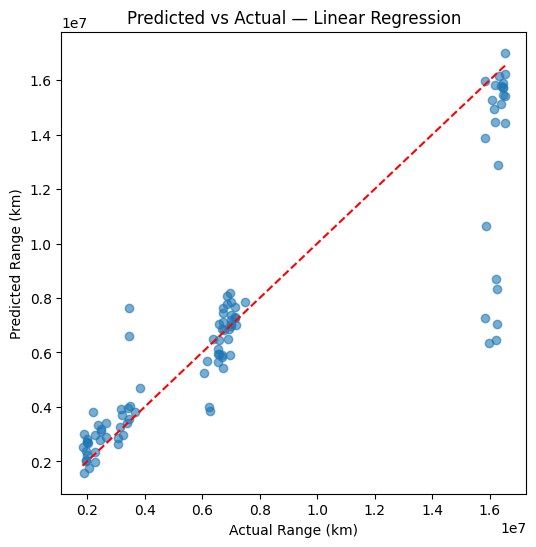

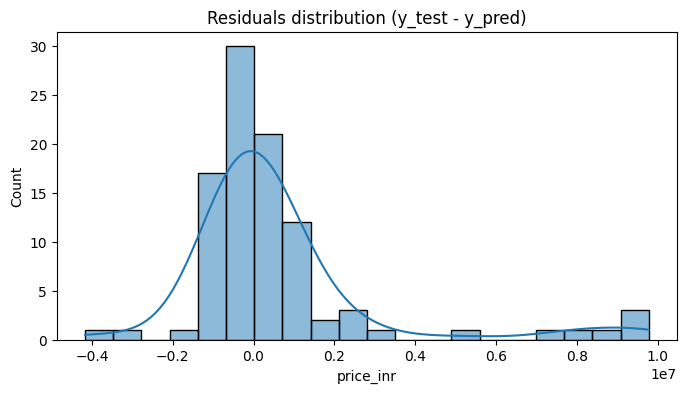

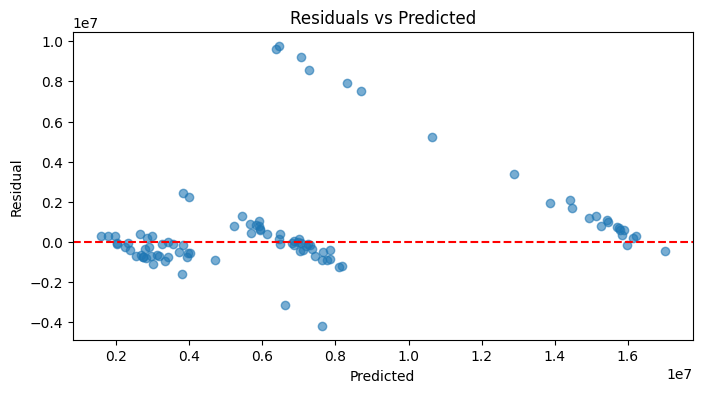

In [91]:
# predicted vs actual & residuals
y_pred_best = best_pipeline.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Range (km)")
plt.ylabel("Predicted Range (km)")
plt.title(f"Predicted vs Actual — {best_model_name}")
plt.show()

# Residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals distribution (y_test - y_pred)")
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")
plt.show()


In [92]:
pred_df = pd.DataFrame({
    "actual_range": y_test.reset_index(drop=True),
    "predicted_range": y_pred_best
})
pred_df["error"] = pred_df["actual_range"] - pred_df["predicted_range"]
pred_df.to_csv("predictions_summary.csv", index=False)
print("Saved predictions_summary.csv")


Saved predictions_summary.csv
